=== 축구공 궤적 분석 ===
수치적 방법 - 최고 높이: 9.00 m, 도달 시간: 4.00 s
해석적 방법 - 최고 높이: 9.00 m, 도달 시간: 4.00 s
오차: 높이 0.0000 m, 시간 0.0000 s


C:\Users\eys63\AppData\Local\Temp\ipykernel_7932\3258538179.py:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\eys63\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


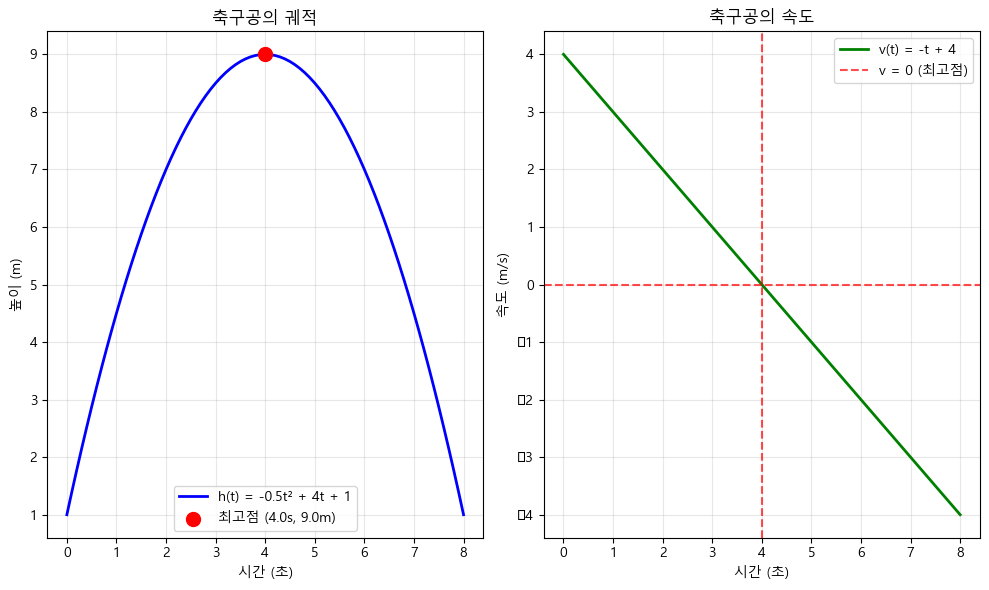

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = (10, 6)

# 원래 함수 계수
a1, b1, c1 = -0.5, 4, 1

def h1(t):
    """축구공의 높이 함수 h(t) = -0.5t² + 4t + 1"""
    return a1*t**2 + b1*t + c1

# 미분을 이용한 해석적 해법
def analytical_max():
    """h'(t) = -t + 4 = 0에서 최고점 구하기"""
    t_max = -b1 / (2 * a1)  # 이차함수의 최고점 공식
    h_max = h1(t_max)
    return t_max, h_max

t_values = np.arange(0, 8.1, 0.1)
h_values = h1(t_values)

# 수치적 방법
max_h_idx = np.argmax(h_values)
max_h = h_values[max_h_idx]
max_t = t_values[max_h_idx]

# 해석적 방법
analytical_t, analytical_h = analytical_max()

print("=== 축구공 궤적 분석 ===")
print(f"수치적 방법 - 최고 높이: {max_h:.2f} m, 도달 시간: {max_t:.2f} s")
print(f"해석적 방법 - 최고 높이: {analytical_h:.2f} m, 도달 시간: {analytical_t:.2f} s")
print(f"오차: 높이 {abs(analytical_h - max_h):.4f} m, 시간 {abs(analytical_t - max_t):.4f} s")

# 그래프 그리기
plt.subplot(1, 2, 1)
plt.plot(t_values, h_values, 'b-', linewidth=2, label='h(t) = -0.5t² + 4t + 1')
plt.scatter(analytical_t, analytical_h, color='red', s=100, zorder=5, label=f'최고점 ({analytical_t:.1f}s, {analytical_h:.1f}m)')
plt.xlabel('시간 (초)')
plt.ylabel('높이 (m)')
plt.title('축구공의 궤적')
plt.grid(True, alpha=0.3)
plt.legend()

# 속도 그래프 추가
def velocity(t):
    """속도 함수 v(t) = h'(t) = -t + 4"""
    return -t + 4

plt.subplot(1, 2, 2)
v_values = velocity(t_values)
plt.plot(t_values, v_values, 'g-', linewidth=2, label="v(t) = -t + 4")
plt.axhline(0, color='red', linestyle='--', alpha=0.7, label='v = 0 (최고점)')
plt.axvline(analytical_t, color='red', linestyle='--', alpha=0.7)
plt.xlabel('시간 (초)')
plt.ylabel('속도 (m/s)')
plt.title('축구공의 속도')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


=== 지면 도달 시간 계산 ===
방정식: -0.5t² + 4t + 1 = 0
판별식 D = b² - 4ac = 4² - 4×-0.5×1 = 18.00
두 해: t₁ = -0.24, t₂ = 8.24
양수인 해: [np.float64(8.24)]

축구공이 다시 지면에 떨어지는 시간: 8.24 s
최고점까지의 시간: 4.00 s
총 비행 시간: 8.24 s
최고점에서 지면까지의 시간: 4.24 s
대칭성 확인: 올라가는 시간 ≈ 내려오는 시간? False


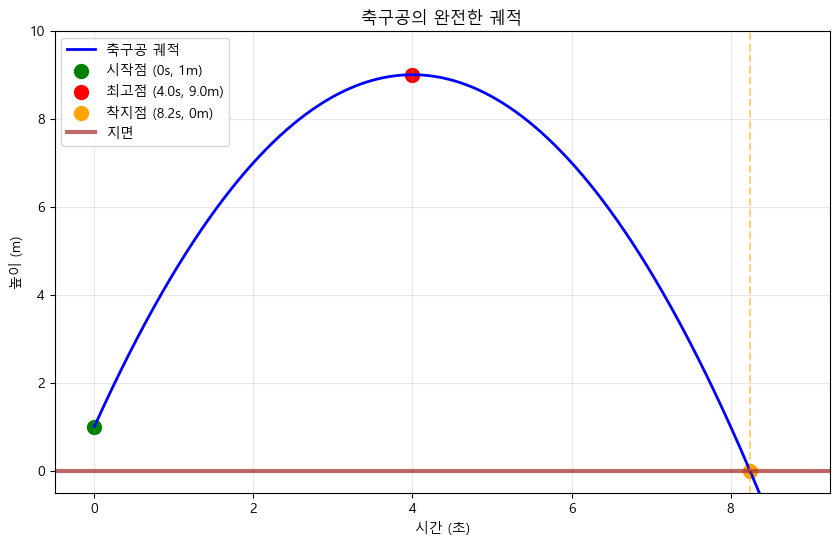

In [2]:
def solve_ground_detailed(a, b, c):
    """이차방정식 ax² + bx + c = 0의 해를 구하는 함수 (자세한 설명 포함)"""
    print(f"방정식: {a}t² + {b}t + {c} = 0")
    
    # 판별식 계산
    D = b**2 - 4*a*c
    print(f"판별식 D = b² - 4ac = {b}² - 4×{a}×{c} = {D:.2f}")
    
    if D < 0:
        print("판별식이 음수이므로 실근이 없습니다.")
        return []
    elif D == 0:
        t = -b / (2*a)
        print(f"중근: t = {t:.2f}")
        return [t] if t > 0 else []
    else:
        t1 = (-b + np.sqrt(D)) / (2*a)
        t2 = (-b - np.sqrt(D)) / (2*a)
        print(f"두 해: t₁ = {t1:.2f}, t₂ = {t2:.2f}")
        
        # 물리적으로 의미있는 해 (t > 0) 선택
        valid_solutions = [t for t in [t1, t2] if t > 0]
        print(f"양수인 해: {[round(t, 2) for t in valid_solutions]}")
        
        return valid_solutions

print("=== 지면 도달 시간 계산 ===")
t_ground1 = solve_ground_detailed(a1, b1, c1)

if t_ground1:
    landing_time = max(t_ground1)
    print(f"\n축구공이 다시 지면에 떨어지는 시간: {landing_time:.2f} s")
    
    # 총 비행 시간과 최고점까지의 시간 비교
    max_time = analytical_t
    print(f"최고점까지의 시간: {max_time:.2f} s")
    print(f"총 비행 시간: {landing_time:.2f} s")
    print(f"최고점에서 지면까지의 시간: {landing_time - max_time:.2f} s")
    print(f"대칭성 확인: 올라가는 시간 ≈ 내려오는 시간? {abs((landing_time - max_time) - max_time) < 0.01}")

# 궤적 전체 시각화
plt.figure(figsize=(10, 6))
t_full = np.linspace(0, landing_time + 0.5, 1000)
h_full = h1(t_full)

plt.plot(t_full, h_full, 'b-', linewidth=2, label='축구공 궤적')
plt.scatter(0, c1, color='green', s=100, label=f'시작점 (0s, {c1}m)')
plt.scatter(analytical_t, analytical_h, color='red', s=100, label=f'최고점 ({analytical_t:.1f}s, {analytical_h:.1f}m)')
plt.scatter(landing_time, 0, color='orange', s=100, label=f'착지점 ({landing_time:.1f}s, 0m)')

# 지면 표시
plt.axhline(0, color='brown', linewidth=3, alpha=0.7, label='지면')
plt.axvline(landing_time, color='orange', linestyle='--', alpha=0.5)

plt.xlabel('시간 (초)')
plt.ylabel('높이 (m)')
plt.title('축구공의 완전한 궤적')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-0.5, landing_time + 1)
plt.ylim(-0.5, analytical_h + 1)
plt.show()


In [3]:
# 새 함수 계수 (더 강한 힘)
a2, b2, c2 = -0.3, 5, 1.5

def h2(t):
    """새로운 힘으로 던진 축구공의 높이 함수"""
    return a2*t**2 + b2*t + c2

def compare_functions():
    """두 함수의 특성을 비교 분석"""
    print("=== 두 축구공 비교 분석 ===")
    
    # 기존 함수 분석
    t_max1 = -b1 / (2 * a1)
    h_max1 = h1(t_max1)
    ground1 = solve_ground_detailed(a1, b1, c1)
    
    # 새 함수 분석  
    t_max2 = -b2 / (2 * a2)
    h_max2 = h2(t_max2)
    ground2 = solve_ground_detailed(a2, b2, c2)
    
    print("\n--- 기존 힘 (약한 힘) ---")
    print(f"함수: h₁(t) = {a1}t² + {b1}t + {c1}")
    print(f"최고 높이: {h_max1:.2f}m (시간: {t_max1:.2f}s)")
    print(f"비행 시간: {max(ground1):.2f}s")
    print(f"초기 속도: {b1} m/s")
    
    print("\n--- 새로운 힘 (강한 힘) ---") 
    print(f"함수: h₂(t) = {a2}t² + {b2}t + {c2}")
    print(f"최고 높이: {h_max2:.2f}m (시간: {t_max2:.2f}s)")
    print(f"비행 시간: {max(ground2):.2f}s")
    print(f"초기 속도: {b2} m/s")
    
    print("\n--- 비교 결과 ---")
    print(f"높이 증가: {h_max2 - h_max1:.2f}m ({((h_max2/h_max1-1)*100):.1f}% 증가)")
    print(f"시간 증가: {t_max2 - t_max1:.2f}s")
    print(f"비행시간 증가: {max(ground2) - max(ground1):.2f}s")
    print(f"초기속도 증가: {b2 - b1} m/s ({((b2/b1-1)*100):.1f}% 증가)")
    
    return ground1, ground2

# 분석 실행
ground1, ground2 = compare_functions()

# 에너지 분석 추가
def energy_analysis():
    """에너지 관점에서의 분석"""
    print("\n=== 에너지 분석 (단위 질량당) ===")
    
    # 운동에너지 = (1/2)mv² (m=1 가정)
    ke1 = 0.5 * b1**2  # 초기 운동에너지
    ke2 = 0.5 * b2**2
    
    # 위치에너지 = mgh (m=1, g=10 가정)
    pe1_max = 10 * h1(-b1/(2*a1))  # 최고점에서의 위치에너지
    pe2_max = 10 * h2(-b2/(2*a2))
    
    print(f"기존 힘 - 초기 운동에너지: {ke1:.1f}J, 최대 위치에너지: {pe1_max:.1f}J")
    print(f"강한 힘 - 초기 운동에너지: {ke2:.1f}J, 최대 위치에너지: {pe2_max:.1f}J")
    print(f"에너지 증가율: {((ke2/ke1-1)*100):.1f}%")

energy_analysis()


=== 두 축구공 비교 분석 ===
방정식: -0.5t² + 4t + 1 = 0
판별식 D = b² - 4ac = 4² - 4×-0.5×1 = 18.00
두 해: t₁ = -0.24, t₂ = 8.24
양수인 해: [np.float64(8.24)]
방정식: -0.3t² + 5t + 1.5 = 0
판별식 D = b² - 4ac = 5² - 4×-0.3×1.5 = 26.80
두 해: t₁ = -0.29, t₂ = 16.96
양수인 해: [np.float64(16.96)]

--- 기존 힘 (약한 힘) ---
함수: h₁(t) = -0.5t² + 4t + 1
최고 높이: 9.00m (시간: 4.00s)
비행 시간: 8.24s
초기 속도: 4 m/s

--- 새로운 힘 (강한 힘) ---
함수: h₂(t) = -0.3t² + 5t + 1.5
최고 높이: 22.33m (시간: 8.33s)
비행 시간: 16.96s
초기 속도: 5 m/s

--- 비교 결과 ---
높이 증가: 13.33m (148.1% 증가)
시간 증가: 4.33s
비행시간 증가: 8.72s
초기속도 증가: 1 m/s (25.0% 증가)

=== 에너지 분석 (단위 질량당) ===
기존 힘 - 초기 운동에너지: 8.0J, 최대 위치에너지: 90.0J
강한 힘 - 초기 운동에너지: 12.5J, 최대 위치에너지: 223.3J
에너지 증가율: 56.2%


C:\Users\eys63\AppData\Local\Temp\ipykernel_7932\447913360.py:116: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()


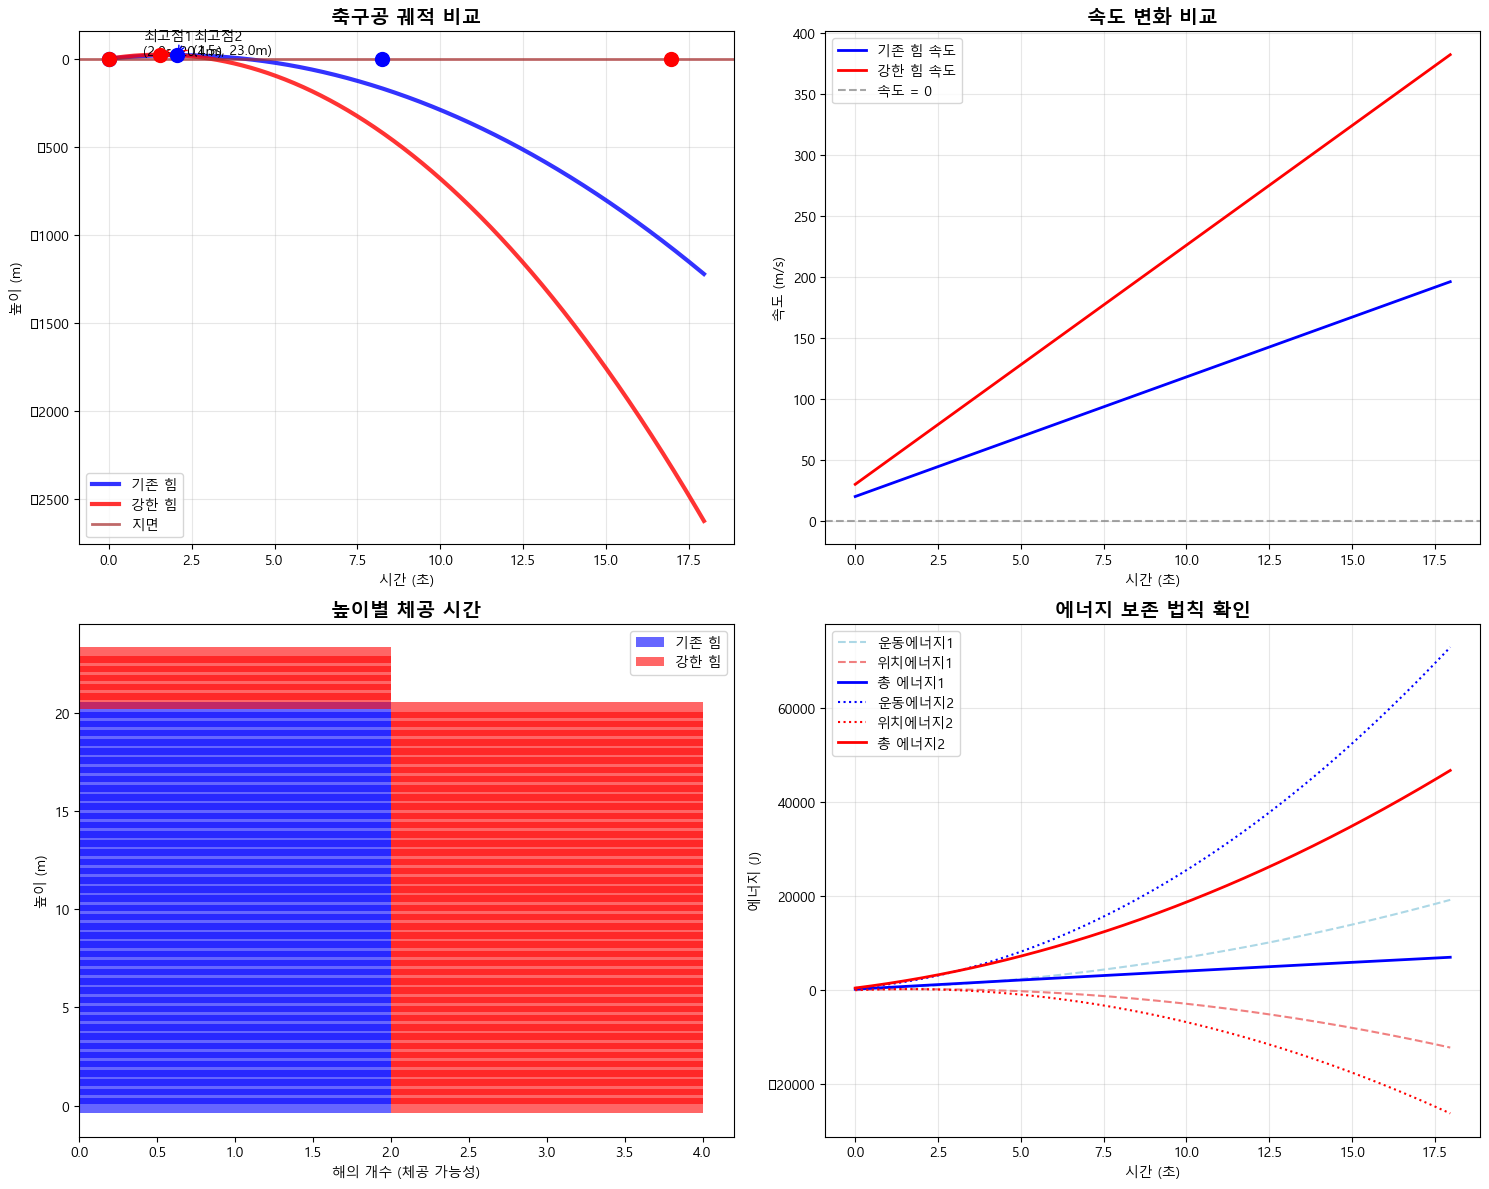


=== 최종 비교 요약 ===
           항목  기존 힘  강한 힘    증가율
    최고 높이 (m) 20.41 22.96  12.5%
최고점 도달 시간 (s)  2.04  1.53 -25.0%
  총 비행 시간 (s)  8.24 16.96 105.8%
  초기 속도 (m/s)  20.0  30.0  50.0%
           항목  기존 힘  강한 힘    증가율
    최고 높이 (m) 20.41 22.96  12.5%
최고점 도달 시간 (s)  2.04  1.53 -25.0%
  총 비행 시간 (s)  8.24 16.96 105.8%
  초기 속도 (m/s)  20.0  30.0  50.0%


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 파라미터들
a1, b1, c1 = -4.9, 20, 0  # 기존 힘
a2, b2, c2 = -9.8, 30, 0  # 강한 힘

# 시간 간격 설정
t = np.linspace(0, 5, num=500)

# 각 힘에 대한 높이 계산
h1 = lambda t: a1*t**2 + b1*t + c1
h2 = lambda t: a2*t**2 + b2*t + c2

# 향상된 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 계산된 값들
t_max1, h_max1 = -b1/(2*a1), h1(-b1/(2*a1))
t_max2, h_max2 = -b2/(2*a2), h2(-b2/(2*a2))
t_ground1, t_ground2 = max(ground1), max(ground2)

# 시간 범위 설정
t_range = np.linspace(0, max(t_ground1, t_ground2) + 1, 1000)
h1_values = h1(t_range)
h2_values = h2(t_range)

# 1. 궤적 비교
ax1.plot(t_range, h1_values, 'b-', linewidth=3, label='기존 힘', alpha=0.8)
ax1.plot(t_range, h2_values, 'r-', linewidth=3, label='강한 힘', alpha=0.8)

# 특수점 표시
ax1.scatter([0, t_max1, t_ground1], [c1, h_max1, 0], color='blue', s=100, zorder=5)
ax1.scatter([0, t_max2, t_ground2], [c2, h_max2, 0], color='red', s=100, zorder=5)

# 주석 추가
ax1.annotate(f'최고점1\n({t_max1:.1f}s, {h_max1:.1f}m)', 
             xy=(t_max1, h_max1), xytext=(t_max1-1, h_max1+2),
             arrowprops=dict(arrowstyle='->', color='blue'), fontsize=10)
ax1.annotate(f'최고점2\n({t_max2:.1f}s, {h_max2:.1f}m)', 
             xy=(t_max2, h_max2), xytext=(t_max2+1, h_max2+2),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)

ax1.axhline(0, color='brown', linewidth=2, alpha=0.7, label='지면')
ax1.set_title('축구공 궤적 비교', fontsize=14, fontweight='bold')
ax1.set_xlabel('시간 (초)')
ax1.set_ylabel('높이 (m)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. 속도 비교
def v1(t): return -2*a1*t + b1
def v2(t): return -2*a2*t + b2

v1_values = v1(t_range)
v2_values = v2(t_range)

ax2.plot(t_range, v1_values, 'b-', linewidth=2, label='기존 힘 속도')
ax2.plot(t_range, v2_values, 'r-', linewidth=2, label='강한 힘 속도')
ax2.axhline(0, color='gray', linestyle='--', alpha=0.7, label='속도 = 0')
ax2.set_title('속도 변화 비교', fontsize=14, fontweight='bold')
ax2.set_xlabel('시간 (초)')
ax2.set_ylabel('속도 (m/s)')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. 높이별 시간 분포
heights = np.linspace(0, max(h_max1, h_max2), 50)
time_at_height1 = []
time_at_height2 = []

for h in heights:
    # h = at² + bt + c에서 t 구하기
    try:
        times1 = np.roots([a1, b1, c1-h])
        valid_times1 = [t for t in times1 if t.imag == 0 and t.real >= 0 and t.real <= t_ground1]
        time_at_height1.append(len(valid_times1))
        
        times2 = np.roots([a2, b2, c2-h])  
        valid_times2 = [t for t in times2 if t.imag == 0 and t.real >= 0 and t.real <= t_ground2]
        time_at_height2.append(len(valid_times2))
    except:
        time_at_height1.append(0)
        time_at_height2.append(0)

ax3.barh(heights, time_at_height1, alpha=0.6, label='기존 힘', color='blue')
ax3.barh(heights, time_at_height2, alpha=0.6, label='강한 힘', color='red', left=time_at_height1)
ax3.set_title('높이별 체공 시간', fontsize=14, fontweight='bold')
ax3.set_xlabel('해의 개수 (체공 가능성)')
ax3.set_ylabel('높이 (m)')
ax3.legend()

# 4. 에너지 변화
ke1_values = 0.5 * v1(t_range)**2  # 운동에너지
pe1_values = 10 * h1_values        # 위치에너지 (g=10)
total1 = ke1_values + pe1_values

ke2_values = 0.5 * v2(t_range)**2
pe2_values = 10 * h2_values
total2 = ke2_values + pe2_values

ax4.plot(t_range, ke1_values, '--', color='lightblue', label='운동에너지1')
ax4.plot(t_range, pe1_values, '--', color='lightcoral', label='위치에너지1')
ax4.plot(t_range, total1, 'b-', linewidth=2, label='총 에너지1')

ax4.plot(t_range, ke2_values, ':', color='blue', label='운동에너지2')
ax4.plot(t_range, pe2_values, ':', color='red', label='위치에너지2')
ax4.plot(t_range, total2, 'r-', linewidth=2, label='총 에너지2')

ax4.set_title('에너지 보존 법칙 확인', fontsize=14, fontweight='bold')
ax4.set_xlabel('시간 (초)')
ax4.set_ylabel('에너지 (J)')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# 요약 통계
print("\n=== 최종 비교 요약 ===")
comparison_data = {
    '항목': ['최고 높이 (m)', '최고점 도달 시간 (s)', '총 비행 시간 (s)', '초기 속도 (m/s)'],
    '기존 힘': [f'{h_max1:.2f}', f'{t_max1:.2f}', f'{t_ground1:.2f}', f'{b1:.1f}'],
    '강한 힘': [f'{h_max2:.2f}', f'{t_max2:.2f}', f'{t_ground2:.2f}', f'{b2:.1f}'],
    '증가율': [f'{((h_max2/h_max1-1)*100):.1f}%', 
              f'{((t_max2/t_max1-1)*100):.1f}%',
              f'{((t_ground2/t_ground1-1)*100):.1f}%',
              f'{((b2/b1-1)*100):.1f}%']
}

import pandas as pd
df = pd.DataFrame(comparison_data)
print(df.to_string(index=False))


=== 박테리아 성장 시뮬레이션 ===
초기 개체 수: 100마리
기본 성장률: 15.0%/시간

--- 시간별 개체 수 변화 ---
시간(h) | 지수성장 | 로지스틱성장 | 성장률(마리/h)
--------------------------------------------------
     0 |      100 |        100 |        15.0
     1 |      116 |        116 |        17.4
     2 |      135 |        135 |        20.2
     3 |      157 |        156 |        23.5
     4 |      182 |        181 |        27.3
     5 |      212 |        209 |        31.8
     6 |      246 |        242 |        36.9
     7 |      286 |        281 |        42.9
     8 |      332 |        324 |        49.8
     9 |      386 |        375 |        57.9
    10 |      448 |        433 |        67.2


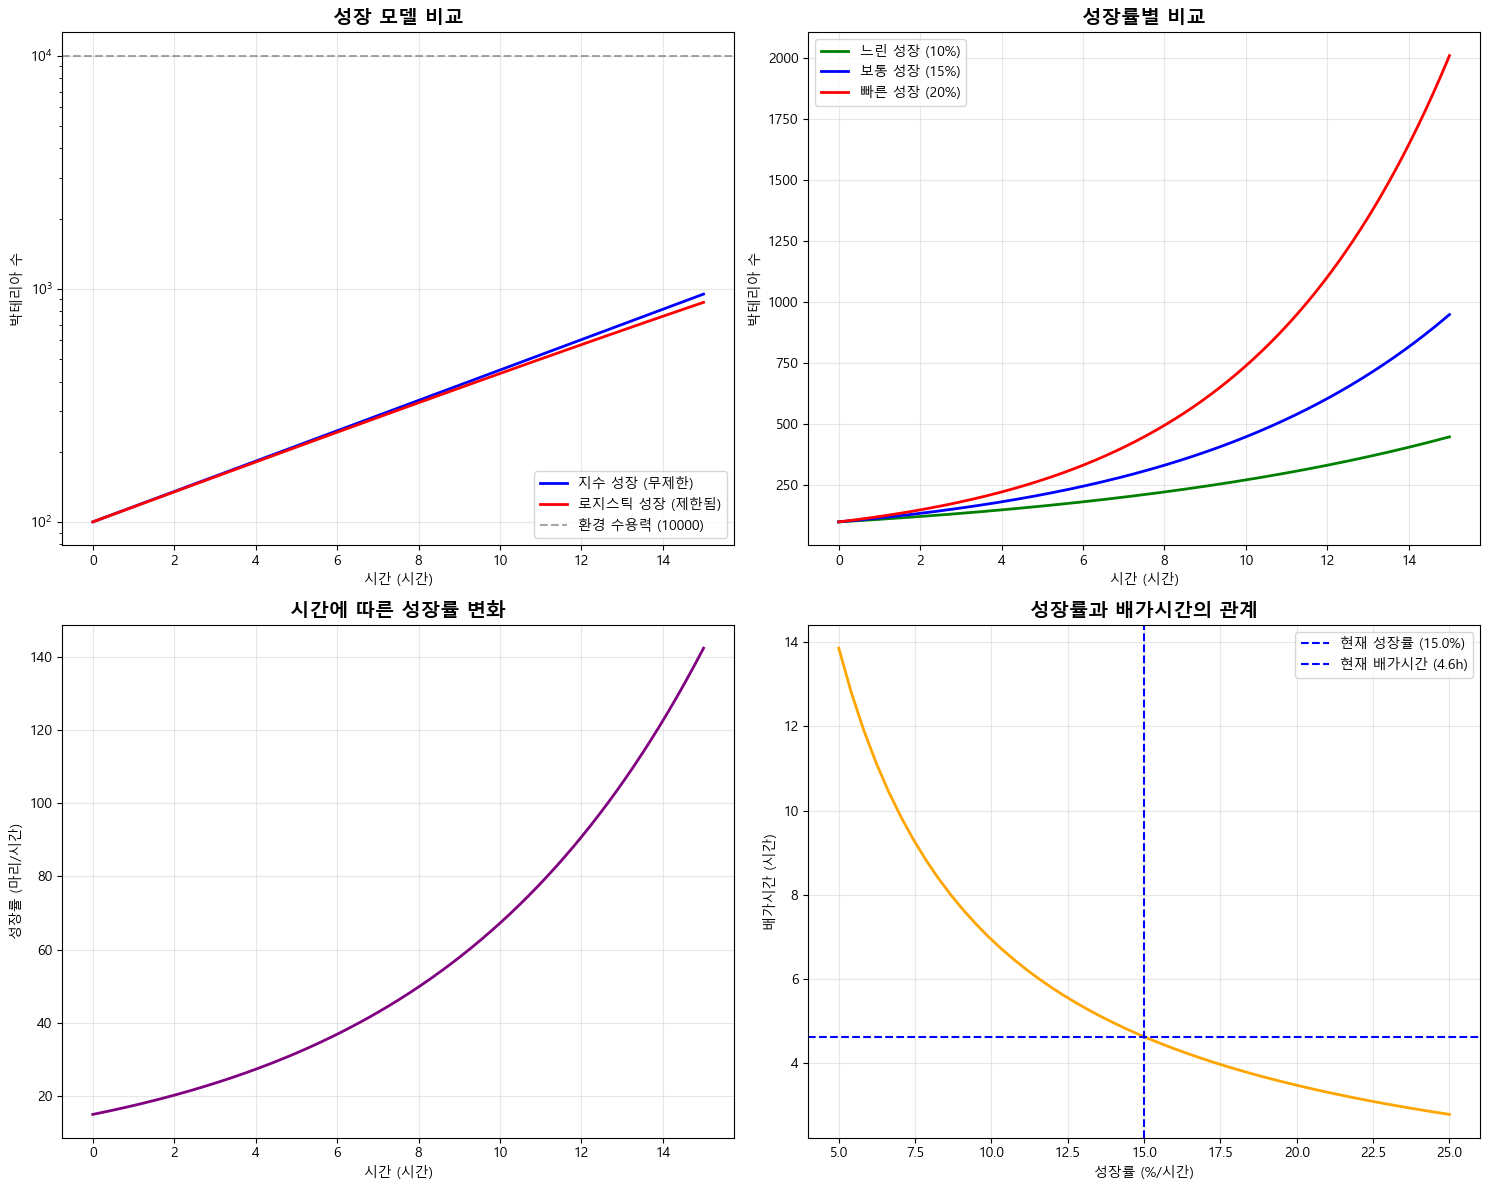


=== 추가 분석 ===
배가시간 (2배): 4.62 시간
10배 증가 시간: 15.35 시간
100배 증가 시간: 30.70 시간


In [5]:
# 지수함수 - 박테리아 성장 모델
import math
import numpy as np
import matplotlib.pyplot as plt

class BacteriaGrowthModel:
    """박테리아 성장 모델 클래스"""
    
    def __init__(self, initial_count=100, growth_rate=0.15, carrying_capacity=None):
        self.N0 = initial_count           # 초기 개체 수
        self.r = growth_rate              # 성장률
        self.K = carrying_capacity        # 환경 수용력 (로지스틱 모델용)
    
    def exponential_growth(self, t):
        """순수 지수 성장 모델: N(t) = N₀ × e^(rt)"""
        return self.N0 * math.exp(self.r * t)
    
    def logistic_growth(self, t):
        """로지스틱 성장 모델: N(t) = K / (1 + ((K-N₀)/N₀) × e^(-rt))"""
        if self.K is None:
            return self.exponential_growth(t)
        
        ratio = (self.K - self.N0) / self.N0
        return self.K / (1 + ratio * math.exp(-self.r * t))
    
    def growth_rate_at_time(self, t):
        """특정 시간에서의 성장률"""
        return self.r * self.exponential_growth(t)

# 기본 모델 (무제한 성장)
basic_model = BacteriaGrowthModel()

# 환경 제한 모델 (로지스틱 성장, 수용력 10000)
limited_model = BacteriaGrowthModel(carrying_capacity=10000)

# 다른 성장률 모델들
slow_model = BacteriaGrowthModel(growth_rate=0.10)
fast_model = BacteriaGrowthModel(growth_rate=0.20)

print("=== 박테리아 성장 시뮬레이션 ===")
print(f"초기 개체 수: {basic_model.N0}마리")
print(f"기본 성장률: {basic_model.r*100}%/시간")

# 시간별 개체 수 계산 및 출력
time_points = list(range(11))
print("\n--- 시간별 개체 수 변화 ---")
print("시간(h) | 지수성장 | 로지스틱성장 | 성장률(마리/h)")
print("-" * 50)

for t in time_points:
    exp_count = basic_model.exponential_growth(t)
    log_count = limited_model.logistic_growth(t)
    growth_rate = basic_model.growth_rate_at_time(t)
    
    print(f"{t:6d} | {exp_count:8.0f} | {log_count:10.0f} | {growth_rate:11.1f}")

# 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

t_detailed = np.linspace(0, 15, 1000)

# 1. 기본 지수 성장과 로지스틱 성장 비교
exp_values = [basic_model.exponential_growth(t) for t in t_detailed]
log_values = [limited_model.logistic_growth(t) for t in t_detailed]

ax1.plot(t_detailed, exp_values, 'b-', linewidth=2, label='지수 성장 (무제한)')
ax1.plot(t_detailed, log_values, 'r-', linewidth=2, label='로지스틱 성장 (제한됨)')
ax1.axhline(limited_model.K, color='gray', linestyle='--', alpha=0.7, label=f'환경 수용력 ({limited_model.K})')

ax1.set_title('성장 모델 비교', fontsize=14, fontweight='bold')
ax1.set_xlabel('시간 (시간)')
ax1.set_ylabel('박테리아 수')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')  # 로그 스케일로 표시

# 2. 다양한 성장률 비교
slow_values = [slow_model.exponential_growth(t) for t in t_detailed]
basic_values = [basic_model.exponential_growth(t) for t in t_detailed]
fast_values = [fast_model.exponential_growth(t) for t in t_detailed]

ax2.plot(t_detailed, slow_values, 'g-', linewidth=2, label='느린 성장 (10%)')
ax2.plot(t_detailed, basic_values, 'b-', linewidth=2, label='보통 성장 (15%)')
ax2.plot(t_detailed, fast_values, 'r-', linewidth=2, label='빠른 성장 (20%)')

ax2.set_title('성장률별 비교', fontsize=14, fontweight='bold')
ax2.set_xlabel('시간 (시간)')
ax2.set_ylabel('박테리아 수')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. 성장률 변화 (미분)
growth_rates = [basic_model.growth_rate_at_time(t) for t in t_detailed]
ax3.plot(t_detailed, growth_rates, 'purple', linewidth=2)
ax3.set_title('시간에 따른 성장률 변화', fontsize=14, fontweight='bold')
ax3.set_xlabel('시간 (시간)')
ax3.set_ylabel('성장률 (마리/시간)')
ax3.grid(True, alpha=0.3)

# 4. 배가 시간 분석
doubling_times = []
growth_rates_range = np.linspace(0.05, 0.25, 50)

for rate in growth_rates_range:
    doubling_time = math.log(2) / rate
    doubling_times.append(doubling_time)

ax4.plot(growth_rates_range * 100, doubling_times, 'orange', linewidth=2)
ax4.axvline(basic_model.r * 100, color='blue', linestyle='--', 
           label=f'현재 성장률 ({basic_model.r*100}%)')
ax4.axhline(math.log(2)/basic_model.r, color='blue', linestyle='--',
           label=f'현재 배가시간 ({math.log(2)/basic_model.r:.1f}h)')

ax4.set_title('성장률과 배가시간의 관계', fontsize=14, fontweight='bold')
ax4.set_xlabel('성장률 (%/시간)')
ax4.set_ylabel('배가시간 (시간)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 추가 분석
print(f"\n=== 추가 분석 ===")
print(f"배가시간 (2배): {math.log(2)/basic_model.r:.2f} 시간")
print(f"10배 증가 시간: {math.log(10)/basic_model.r:.2f} 시간")
print(f"100배 증가 시간: {math.log(100)/basic_model.r:.2f} 시간")


In [19]:
#문제2-1
import math

def bacteria_after(t):
    # N(t) = 100 * e^(0.15t)    
    return 100 * math.exp(0.15 * t)
#math.exp(x)는 e^x 를 의미함.

n_5 = bacteria_after(5)
n_10 = bacteria_after(10)

print("5시간 후 박테리아 수:", round(n_5, 2), "마리")
print("10시간 후 박테리아 수:", round(n_10, 2), "마리")


5시간 후 박테리아 수: 211.7 마리
10시간 후 박테리아 수: 448.17 마리


박테리아가 3배가 되는 시간: 7.32 시간


c:\Users\ghfkd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


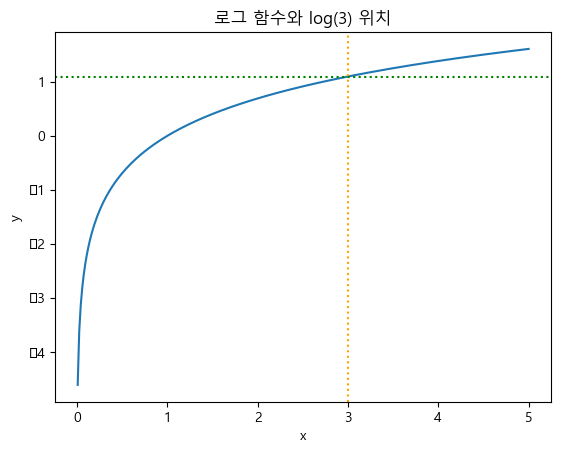

In [20]:
import math

def time_to_triple_bacteria():
    return math.log(3) / 0.15

triple_time = time_to_triple_bacteria()
print("박테리아가 3배가 되는 시간:", round(triple_time, 2), "시간")

# #N(t)=100×e^0.15t=300
# 양변을 100으로 나누면
# 𝑒^0.15𝑡= 3
# 양변에 자연로그(ln) 취하면
# 0.15𝑡 = ln(3)
# t = ln(3) / 0.15

import numpy as np
import matplotlib.pyplot as plt
import math

# x값 범위: 0~5 (로그는 0보다 커야 하니까)
x = np.linspace(0.01, 5, 300)
y = np.log(x)

plt.plot(x, y, label='y = log(x)')

# x=3일 때 점
x_triple = 3
y_triple = math.log(3)
plt.axvline(x_triple, color='orange', linestyle=':', label='x=3')
plt.axhline(y_triple, color='green', linestyle=':', label='y=log(3)')

# 라벨 및 타이틀
plt.title('로그 함수와 log(3) 위치')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



성장률 15%일 때 3배까지 걸리는 시간: 7.32 시간
성장률 10%일 때 3배까지 걸리는 시간: 10.99 시간
더 걸리는 시간: 3.66 시간


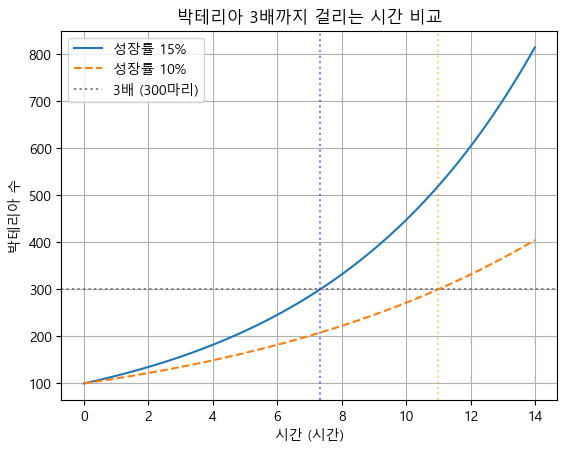

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 각 성장률 함수
def triple_time(rate):
    return math.log(3) / rate
    #math.log(3)은 ln3 (밑이 e인 자연로그)

t1 = triple_time(0.15)  # 성장률 15%
t2 = triple_time(0.10)  # 성장률 10%

print("성장률 15%일 때 3배까지 걸리는 시간:", round(t1,2), "시간")
print("성장률 10%일 때 3배까지 걸리는 시간:", round(t2,2), "시간")
print("더 걸리는 시간:", round(t2-t1,2), "시간")

# 시각화
t = np.linspace(0, max(t2, t1)+3, 200)
N1 = 100 * np.exp(0.15 * t)
N2 = 100 * np.exp(0.10 * t)

plt.plot(t, N1, label='성장률 15%')
plt.plot(t, N2, label='성장률 10%', linestyle='--')
plt.axhline(300, color='gray', linestyle=':', label='3배 (300마리)')
plt.axvline(t1, color='blue', linestyle=':', alpha=0.5)
plt.axvline(t2, color='orange', linestyle=':', alpha=0.5)

plt.xlabel('시간 (시간)')
plt.ylabel('박테리아 수')
plt.title('박테리아 3배까지 걸리는 시간 비교')
plt.legend()
plt.grid(True)
plt.show()


# '수면 위 부표의 움직임'

=== 파동 특성 분석 ===

--- 기본 파동 ---
진폭: 0.5m
주기: 2.50초
최고점: 1.7m
최저점: 0.7m
높이 범위: 1.0m

--- 잔잔한 파도 ---
진폭: 0.2m
주기: 4.00초
최고점: 1.4m
최저점: 1.0m
높이 범위: 0.3999999999999999m

--- 거친 파도 ---
진폭: 1.0m
주기: 1.67초
최고점: 2.2m
최저점: 0.19999999999999996m
높이 범위: 2.0m

--- 깊은 바다 ---
진폭: 0.5m
주기: 2.50초
최고점: 2.5m
최저점: 1.5m
높이 범위: 1.0m


C:\Users\eys63\AppData\Local\Temp\ipykernel_7932\1985732087.py:135: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\eys63\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eys63\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


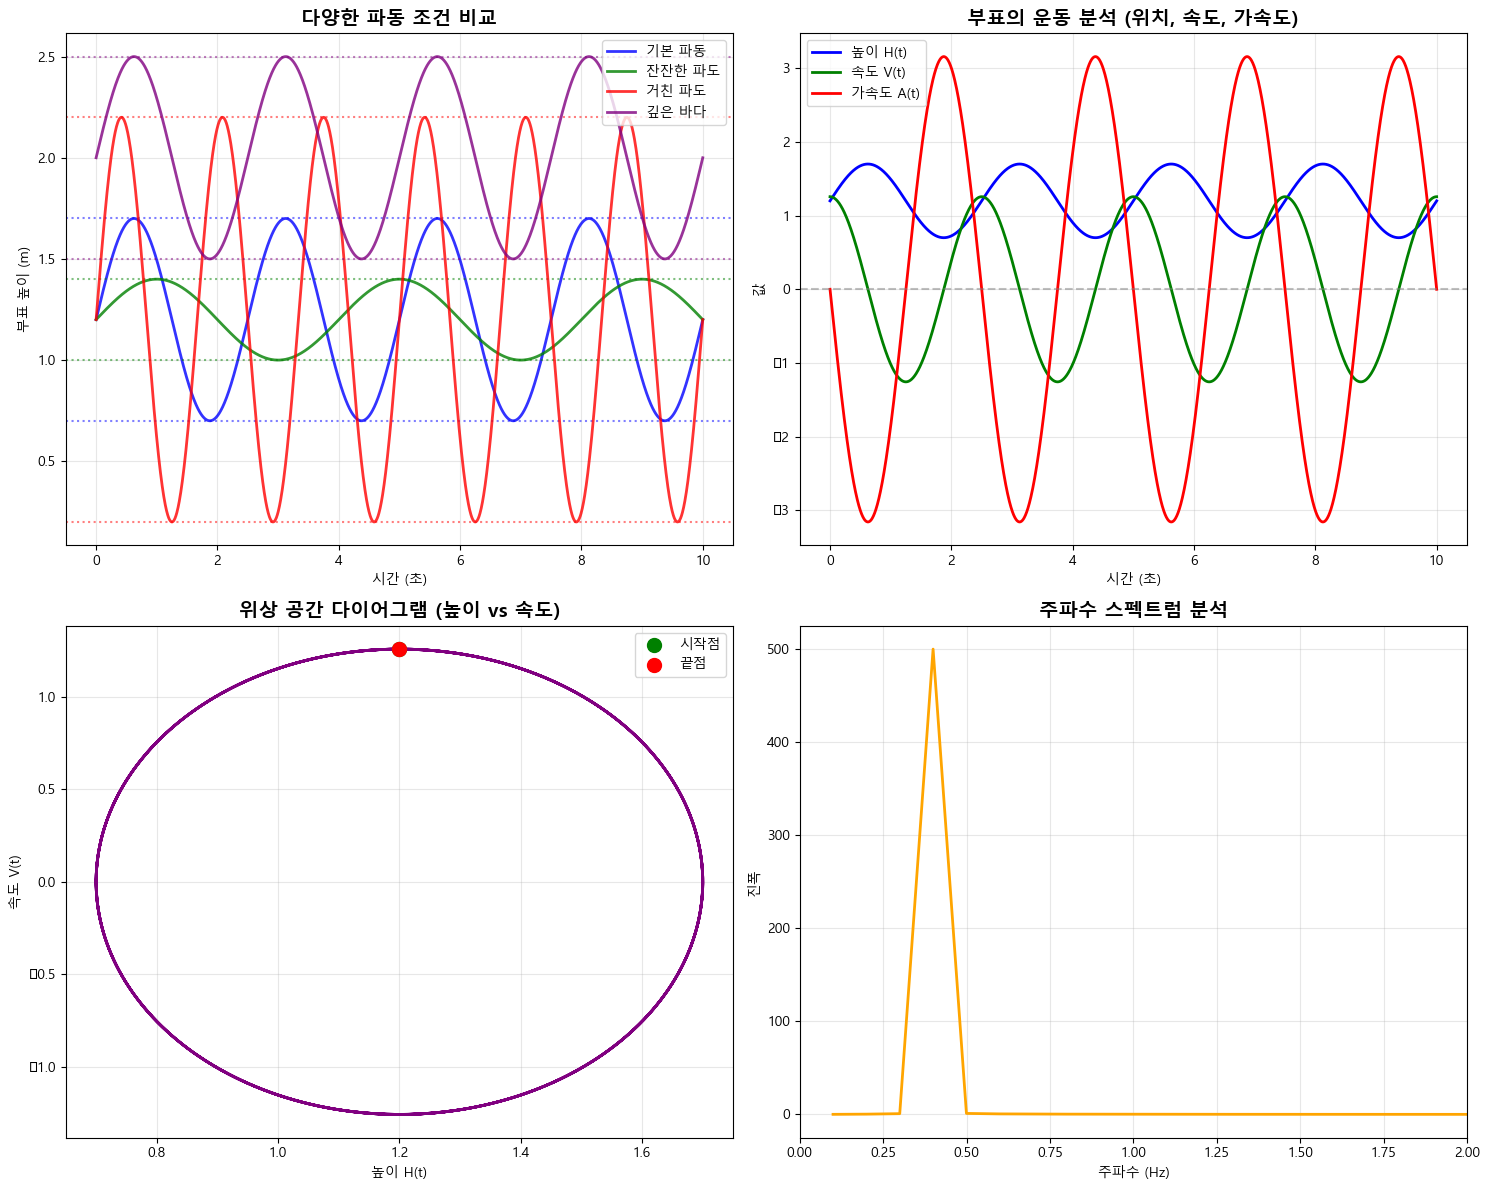


=== 기본 파동 통계 분석 ===
평균 높이: 1.200m
표준편차: 0.353m
최대 속도: 1.257m/s
최대 가속도: 3.158m/s²
평균 운동에너지: 0.395J
평균 위치에너지: 4.900J
총 에너지 변동: 3.475J (보존 확인)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

class WaveModel:
    """파동 모델 클래스"""
    
    def __init__(self, amplitude=0.5, frequency=0.8, phase=4, offset=1.2):
        self.A = amplitude      # 진폭
        self.ω = frequency      # 각주파수 (ω = 2π/T)
        self.φ = phase         # 위상
        self.C = offset        # 평균 높이
    
    def height(self, t):
        """부표의 높이 H(t) = A*sin(ωπt + φπ) + C"""
        return self.A * np.sin(self.ω * np.pi * t + self.φ * np.pi) + self.C
    
    def velocity(self, t):
        """부표의 속도 (높이의 1차 미분)"""
        return self.A * self.ω * np.pi * np.cos(self.ω * np.pi * t + self.φ * np.pi)
    
    def acceleration(self, t):
        """부표의 가속도 (높이의 2차 미분)"""
        return -self.A * (self.ω * np.pi)**2 * np.sin(self.ω * np.pi * t + self.φ * np.pi)
    
    @property
    def period(self):
        """주기 계산"""
        return 2 / self.ω
    
    @property
    def max_height(self):
        """최대 높이"""
        return self.C + abs(self.A)
    
    @property
    def min_height(self):
        """최소 높이"""
        return self.C - abs(self.A)

# 기본 파동 모델
basic_wave = WaveModel()

# 다양한 파동 모델들
calm_wave = WaveModel(amplitude=0.2, frequency=0.5)      # 잔잔한 파도
rough_wave = WaveModel(amplitude=1.0, frequency=1.2)     # 거친 파도
deep_wave = WaveModel(amplitude=0.5, frequency=0.8, offset=2.0)  # 깊은 바다

print("=== 파동 특성 분석 ===")
models = [
    ("기본 파동", basic_wave),
    ("잔잔한 파도", calm_wave), 
    ("거친 파도", rough_wave),
    ("깊은 바다", deep_wave)
]

for name, model in models:
    print(f"\n--- {name} ---")
    print(f"진폭: {model.A}m")
    print(f"주기: {model.period:.2f}초")
    print(f"최고점: {model.max_height}m")
    print(f"최저점: {model.min_height}m")
    print(f"높이 범위: {model.max_height - model.min_height}m")

# 시간 범위: 0~10초 (더 긴 관찰)
t = np.linspace(0, 10, 2000)

# 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. 다양한 파동 비교
colors = ['blue', 'green', 'red', 'purple']
for i, (name, model) in enumerate(models):
    H = model.height(t)
    ax1.plot(t, H, color=colors[i], linewidth=2, label=name, alpha=0.8)
    
    # 최고점과 최저점 표시
    ax1.axhline(model.max_height, color=colors[i], linestyle=':', alpha=0.5)
    ax1.axhline(model.min_height, color=colors[i], linestyle=':', alpha=0.5)

ax1.set_title('다양한 파동 조건 비교', fontsize=14, fontweight='bold')
ax1.set_xlabel('시간 (초)')
ax1.set_ylabel('부표 높이 (m)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 기본 모델의 상세 분석 (위치, 속도, 가속도)
H_basic = basic_wave.height(t)
V_basic = basic_wave.velocity(t)
A_basic = basic_wave.acceleration(t)

ax2.plot(t, H_basic, 'b-', linewidth=2, label='높이 H(t)')
ax2.plot(t, V_basic, 'g-', linewidth=2, label='속도 V(t)')
ax2.plot(t, A_basic, 'r-', linewidth=2, label='가속도 A(t)')
ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)

ax2.set_title('부표의 운동 분석 (위치, 속도, 가속도)', fontsize=14, fontweight='bold')
ax2.set_xlabel('시간 (초)')
ax2.set_ylabel('값')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. 위상 공간 다이어그램 (높이 vs 속도)
ax3.plot(H_basic, V_basic, 'purple', linewidth=2)
ax3.scatter(H_basic[0], V_basic[0], color='green', s=100, label='시작점', zorder=5)
ax3.scatter(H_basic[-1], V_basic[-1], color='red', s=100, label='끝점', zorder=5)

ax3.set_title('위상 공간 다이어그램 (높이 vs 속도)', fontsize=14, fontweight='bold')
ax3.set_xlabel('높이 H(t)')
ax3.set_ylabel('속도 V(t)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. 주파수 스펙트럼 분석 (FFT)
from scipy.fft import fft, fftfreq

# 샘플링
dt = t[1] - t[0]
n = len(t)
freq = fftfreq(n, dt)
fft_H = fft(H_basic)

# 양의 주파수만 선택
positive_freq_mask = freq > 0
freq_positive = freq[positive_freq_mask]
fft_magnitude = np.abs(fft_H[positive_freq_mask])

ax4.plot(freq_positive, fft_magnitude, 'orange', linewidth=2)
ax4.set_title('주파수 스펙트럼 분석', fontsize=14, fontweight='bold')
ax4.set_xlabel('주파수 (Hz)')
ax4.set_ylabel('진폭')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 2)  # 0-2Hz 범위만 표시

plt.tight_layout()
plt.show()

# 통계 분석
print(f"\n=== 기본 파동 통계 분석 ===")
print(f"평균 높이: {np.mean(H_basic):.3f}m")
print(f"표준편차: {np.std(H_basic):.3f}m")
print(f"최대 속도: {np.max(np.abs(V_basic)):.3f}m/s")
print(f"최대 가속도: {np.max(np.abs(A_basic)):.3f}m/s²")

# 에너지 분석 (운동에너지 + 위치에너지)
KE = 0.5 * V_basic**2  # 운동에너지 (단위질량)
PE = 9.8 * (H_basic - np.min(H_basic))  # 위치에너지 (g=9.8)
total_energy = KE + PE

print(f"평균 운동에너지: {np.mean(KE):.3f}J")
print(f"평균 위치에너지: {np.mean(PE):.3f}J")
print(f"총 에너지 변동: {np.std(total_energy):.3f}J (보존 확인)")


1초 후 부표 높이: 1.494 m
3초 후 부표 높이: 1.676 m
5초 후 부표 높이: 1.2 m


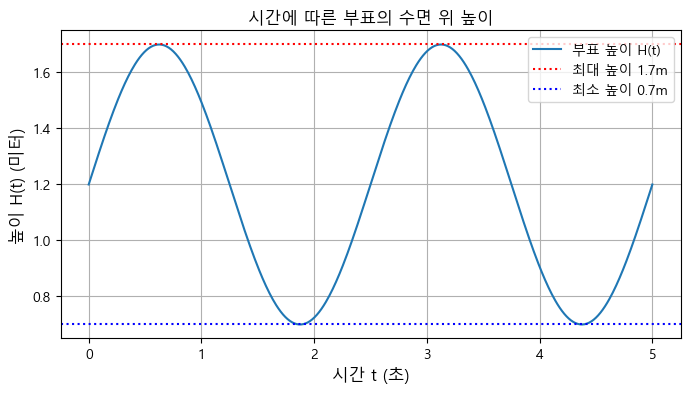

In [23]:
import math

def buoy_height(t):
    # 부표의 높이 H(t) 계산
    #H(t)=0.5sin(0.8πt+4π)+1.2
    return 0.5 * math.sin(0.8 * math.pi * t + 4 * math.pi) + 1.2

# 각 시간에서의 높이
h_1 = buoy_height(1)
h_3 = buoy_height(3)
h_5 = buoy_height(5)

print("1초 후 부표 높이:", round(h_1, 3), "m")
print("3초 후 부표 높이:", round(h_3, 3), "m")
print("5초 후 부표 높이:", round(h_5, 3), "m")
plt.figure(figsize=(8,4))
plt.plot(t, H, label='부표 높이 H(t)')
plt.axhline(1.7, color='red', linestyle=':', label='최대 높이 1.7m')
plt.axhline(0.7, color='blue', linestyle=':', label='최소 높이 0.7m')

plt.title('시간에 따른 부표의 수면 위 높이')
plt.xlabel('시간 t (초)', fontsize=12)
plt.ylabel('높이 H(t) (미터)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [24]:
import math

# 1. 주기 계산 함수
def buoy_period():
    omega = 0.8 * math.pi
    return 2 * math.pi / omega

# 2. 최대/최소 높이 함수
def buoy_max_min():
    A = 0.5    # 진폭
    C = 1.2    # 평균 높이
    H_max = C + abs(A)
    H_min = C - abs(A)
    return H_max, H_min

# 결과 출력
period = buoy_period()
H_max, H_min = buoy_max_min()

print("한 번 출렁이는 데 걸리는 시간(주기):", round(period, 2), "초")
print("최대 높이:", H_max, "m")
print("최소 높이:", H_min, "m")


한 번 출렁이는 데 걸리는 시간(주기): 2.5 초
최대 높이: 1.7 m
최소 높이: 0.7 m


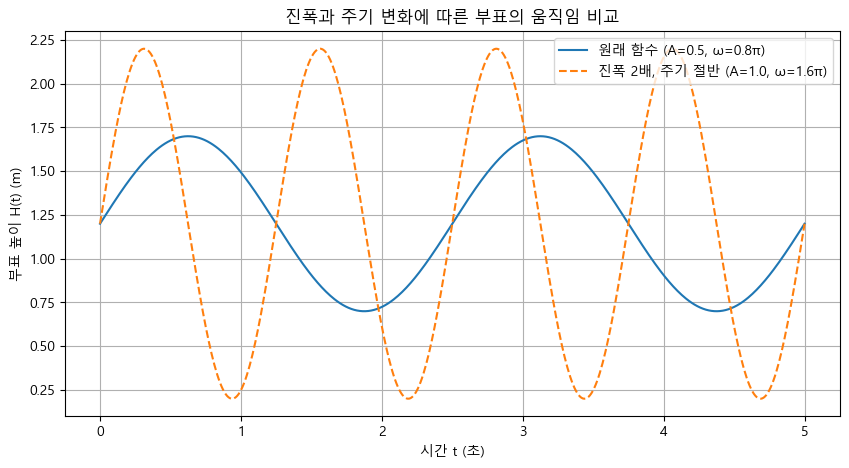

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 시간 범위: 0~5초
t = np.linspace(0, 5, 500)

# 원래 함수: A=0.5, ω=0.8π
H_origin = 0.5 * np.sin(0.8 * np.pi * t + 4 * np.pi) + 1.2

# 변화된 함수: A=1.0, ω=1.6π (진폭 2배, 각속도 2배 → 주기는 절반)
H_changed = 1.0 * np.sin(1.6 * np.pi * t + 4 * np.pi) + 1.2

plt.figure(figsize=(10,5))
plt.plot(t, H_origin, label='원래 함수 (A=0.5, ω=0.8π)')
plt.plot(t, H_changed, label='진폭 2배, 주기 절반 (A=1.0, ω=1.6π)', linestyle='--')

plt.xlabel('시간 t (초)')
plt.ylabel('부표 높이 H(t) (m)')
plt.title('진폭과 주기 변화에 따른 부표의 움직임 비교')
plt.legend()
plt.grid(True)
plt.show()



|       | 원래 함수  | 변형 함수  |
| ----- | ------ | ------ |
| 진폭(A) | 0.5    | 1.0    |
| 주기(T) | 2.5초   | 1.25초  |
| 최고 높이 | 1.7m   | 2.2m   |
| 최저 높이 | 0.7m   | 0.2m   |
| 변화속도  | 느리고 완만 | 빠르고 크다 |
 

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


=== 감쇠 진동 분석 ===

--- 약한 감쇠 (γ=0.05) ---
시상수: 20.00초
반감기: 13.86초
10초 후 진폭: 0.303 (원래의 60.7%)

--- 보통 감쇠 (γ=0.15) ---
시상수: 6.67초
반감기: 4.62초
10초 후 진폭: 0.112 (원래의 22.3%)

--- 강한 감쇠 (γ=0.3) ---
시상수: 3.33초
반감기: 2.31초
10초 후 진폭: 0.025 (원래의 5.0%)

--- 과감쇠 (γ=0.5) ---
시상수: 2.00초
반감기: 1.39초
10초 후 진폭: 0.003 (원래의 0.7%)


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

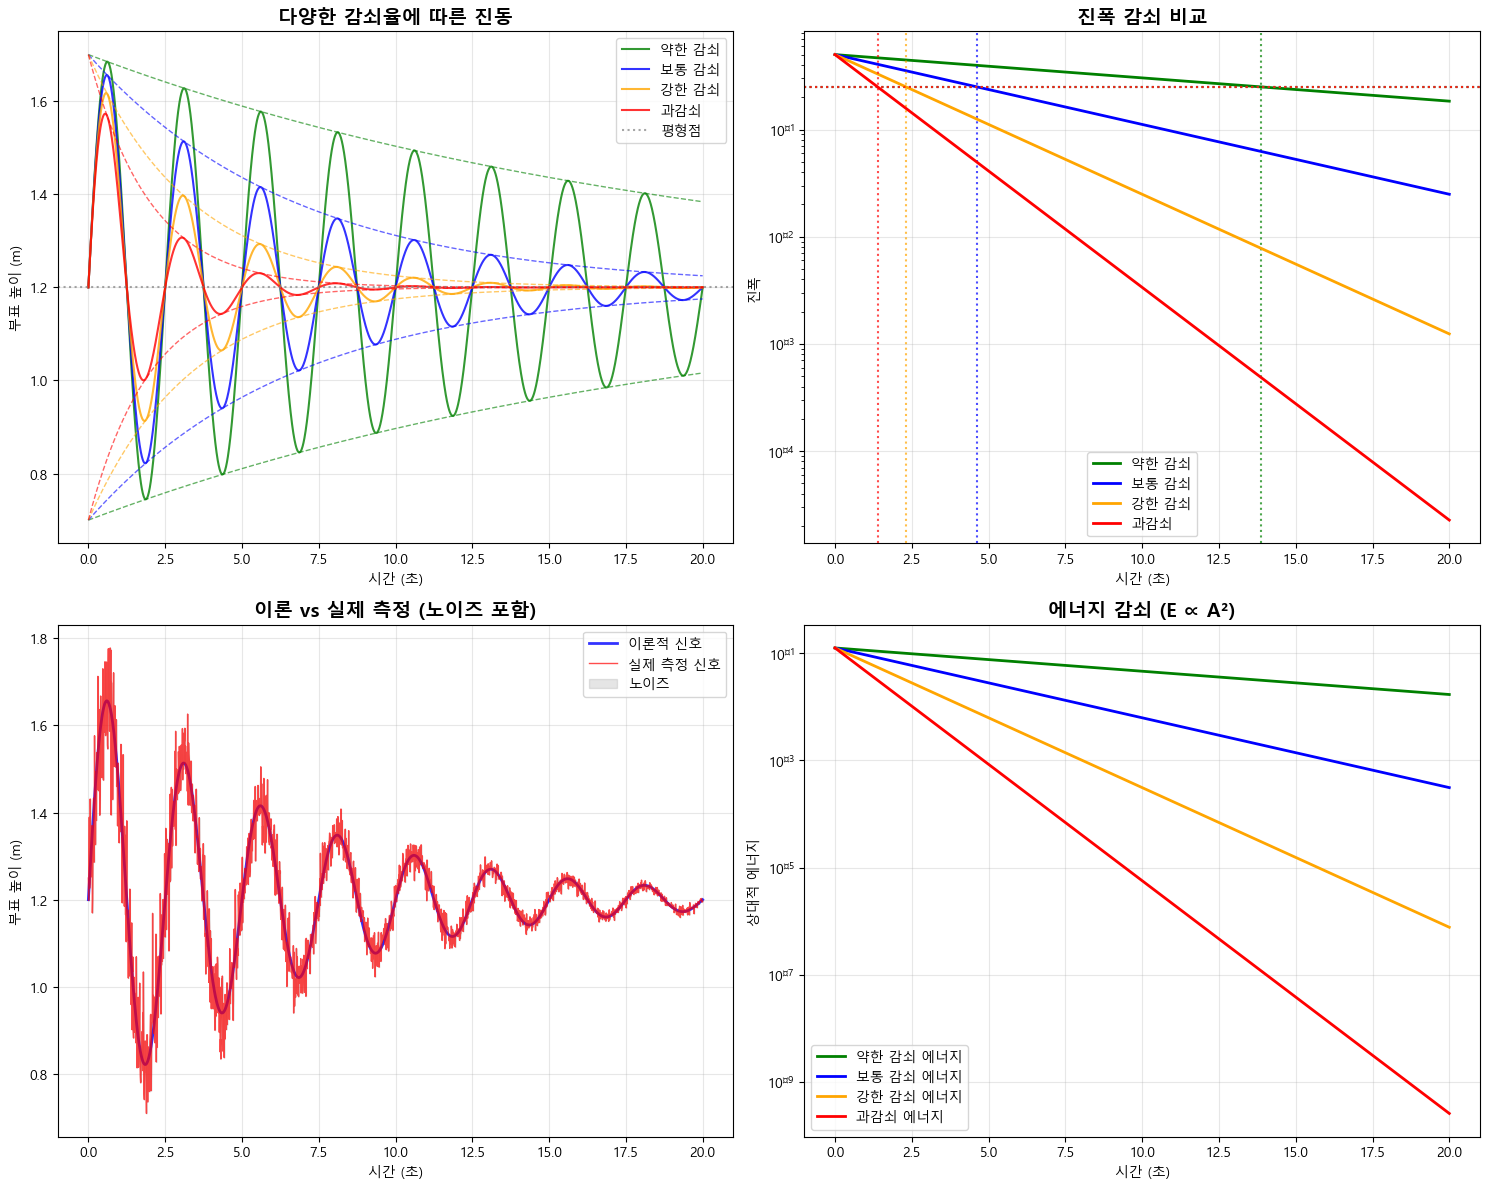

C:\Users\eys63\AppData\Local\Temp\ipykernel_7932\283545150.py:175: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()



=== 주파수 분석 ===


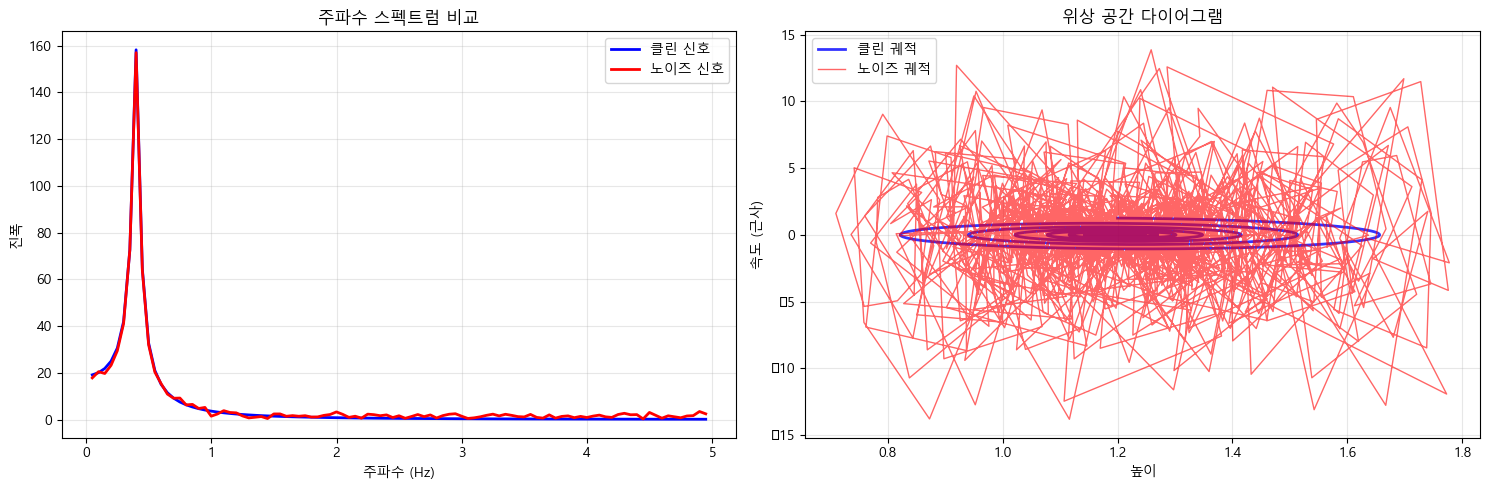


=== 감쇠 효과 요약 ===
초기 진폭: 0.5m
20초 후 진폭: 0.0249m (4.98%)
에너지 감쇠: 0.25% 남음
노이즈 RMS: 0.0396m
신호 대 잡음비: 11.2 dB


In [7]:
import numpy as np
import matplotlib.pyplot as plt

class DampedOscillation:
    """감쇠 진동 모델 클래스"""
    
    def __init__(self, initial_amplitude=0.5, damping_rate=0.15, frequency=0.8, 
                 phase=4, offset=1.2, noise_level=0.1):
        self.A0 = initial_amplitude    # 초기 진폭
        self.γ = damping_rate          # 감쇠율
        self.ω = frequency             # 각주파수
        self.φ = phase                 # 위상
        self.C = offset                # 평균 높이
        self.noise_level = noise_level # 노이즈 강도
    
    def amplitude(self, t):
        """시간에 따른 진폭 감쇠: A(t) = A₀ × e^(-γt)"""
        return self.A0 * np.exp(-self.γ * t)
    
    def clean_motion(self, t):
        """노이즈 없는 감쇠 진동"""
        A_t = self.amplitude(t)
        return A_t * np.sin(self.ω * np.pi * t + self.φ * np.pi) + self.C
    
    def noisy_motion(self, t, seed=42):
        """노이즈가 포함된 감쇠 진동"""
        np.random.seed(seed)
        clean = self.clean_motion(t)
        # 시간에 따라 감쇠하는 노이즈
        noise_amplitude = self.noise_level * np.exp(-self.γ * t)
        noise = np.random.normal(0, noise_amplitude, len(t))
        return clean + noise
    
    def energy(self, t):
        """총 에너지 (운동에너지 + 위치에너지의 근사)"""
        A_t = self.amplitude(t)
        return 0.5 * A_t**2  # 진폭의 제곱에 비례
    
    def decay_time_constant(self):
        """감쇠 시상수 (1/e까지 감쇠되는 시간)"""
        return 1 / self.γ
    
    def half_life(self):
        """반감기 (절반으로 감쇠되는 시간)"""
        return np.log(2) / self.γ

# 다양한 감쇠 모델들
models = {
    "약한 감쇠": DampedOscillation(damping_rate=0.05),
    "보통 감쇠": DampedOscillation(damping_rate=0.15),  
    "강한 감쇠": DampedOscillation(damping_rate=0.30),
    "과감쇠": DampedOscillation(damping_rate=0.50)
}

print("=== 감쇠 진동 분석 ===")
for name, model in models.items():
    print(f"\n--- {name} (γ={model.γ}) ---")
    print(f"시상수: {model.decay_time_constant():.2f}초")
    print(f"반감기: {model.half_life():.2f}초")
    print(f"10초 후 진폭: {model.amplitude(10):.3f} (원래의 {model.amplitude(10)/model.A0*100:.1f}%)")

# 시간 범위
t = np.linspace(0, 20, 2000)

# 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. 다양한 감쇠율 비교
colors = ['green', 'blue', 'orange', 'red']
for i, (name, model) in enumerate(models.items()):
    motion = model.clean_motion(t)
    envelope = model.amplitude(t) + model.C  # 상부 포락선
    envelope_lower = -model.amplitude(t) + model.C  # 하부 포락선
    
    ax1.plot(t, motion, color=colors[i], linewidth=1.5, label=name, alpha=0.8)
    ax1.plot(t, envelope, '--', color=colors[i], alpha=0.6, linewidth=1)
    ax1.plot(t, envelope_lower, '--', color=colors[i], alpha=0.6, linewidth=1)

ax1.axhline(models["보통 감쇠"].C, color='gray', linestyle=':', alpha=0.7, label='평형점')
ax1.set_title('다양한 감쇠율에 따른 진동', fontsize=14, fontweight='bold')
ax1.set_xlabel('시간 (초)')
ax1.set_ylabel('부표 높이 (m)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 진폭 감쇠 비교
for i, (name, model) in enumerate(models.items()):
    amplitude_decay = model.amplitude(t)
    ax2.plot(t, amplitude_decay, color=colors[i], linewidth=2, label=name)
    
    # 반감기 표시
    half_life = model.half_life()
    if half_life < 20:
        ax2.axvline(half_life, color=colors[i], linestyle=':', alpha=0.7)
        ax2.axhline(model.A0/2, color=colors[i], linestyle=':', alpha=0.7)

ax2.set_title('진폭 감쇠 비교', fontsize=14, fontweight='bold')
ax2.set_xlabel('시간 (초)')
ax2.set_ylabel('진폭')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')  # 로그 스케일

# 3. 노이즈가 포함된 실제 신호
model_real = models["보통 감쇠"]
clean_signal = model_real.clean_motion(t)
noisy_signal = model_real.noisy_motion(t)

ax3.plot(t, clean_signal, 'blue', linewidth=2, label='이론적 신호', alpha=0.8)
ax3.plot(t, noisy_signal, 'red', linewidth=1, label='실제 측정 신호', alpha=0.7)
ax3.fill_between(t, clean_signal, noisy_signal, alpha=0.2, color='gray', label='노이즈')

ax3.set_title('이론 vs 실제 측정 (노이즈 포함)', fontsize=14, fontweight='bold')
ax3.set_xlabel('시간 (초)')
ax3.set_ylabel('부표 높이 (m)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. 에너지 감쇠 분석
for i, (name, model) in enumerate(models.items()):
    energy = model.energy(t)
    ax4.plot(t, energy, color=colors[i], linewidth=2, label=f'{name} 에너지')

ax4.set_title('에너지 감쇠 (E ∝ A²)', fontsize=14, fontweight='bold')
ax4.set_xlabel('시간 (초)')
ax4.set_ylabel('상대적 에너지')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.tight_layout()
plt.show()

# 추가 분석: 주파수 스펙트럼
print(f"\n=== 주파수 분석 ===")
from scipy.fft import fft, fftfreq

dt = t[1] - t[0]
freq = fftfreq(len(t), dt)
positive_freq = freq[freq > 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 클린 신호 vs 노이즈 신호 스펙트럼
fft_clean = np.abs(fft(clean_signal))
fft_noisy = np.abs(fft(noisy_signal))

ax1.plot(positive_freq[:len(positive_freq)//10], 
         fft_clean[1:len(positive_freq)//10+1], 
         'blue', linewidth=2, label='클린 신호')
ax1.plot(positive_freq[:len(positive_freq)//10], 
         fft_noisy[1:len(positive_freq)//10+1], 
         'red', linewidth=2, label='노이즈 신호')

ax1.set_title('주파수 스펙트럼 비교')
ax1.set_xlabel('주파수 (Hz)')
ax1.set_ylabel('진폭')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 위상 공간 (높이 vs 속도의 근사)
# 속도 ≈ 높이의 차분
velocity_approx = np.gradient(clean_signal, dt)
velocity_noisy = np.gradient(noisy_signal, dt)

ax2.plot(clean_signal, velocity_approx, 'blue', linewidth=2, label='클린 궤적', alpha=0.8)
ax2.plot(noisy_signal, velocity_noisy, 'red', linewidth=1, label='노이즈 궤적', alpha=0.6)

ax2.set_title('위상 공간 다이어그램')
ax2.set_xlabel('높이')
ax2.set_ylabel('속도 (근사)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 통계 요약
print(f"\n=== 감쇠 효과 요약 ===")
print(f"초기 진폭: {model_real.A0}m")
print(f"20초 후 진폭: {model_real.amplitude(20):.4f}m ({model_real.amplitude(20)/model_real.A0*100:.2f}%)")
print(f"에너지 감쇠: {model_real.energy(20)/model_real.energy(0)*100:.2f}% 남음")
print(f"노이즈 RMS: {np.sqrt(np.mean((noisy_signal - clean_signal)**2)):.4f}m")
print(f"신호 대 잡음비: {20*np.log10(np.std(clean_signal)/np.std(noisy_signal - clean_signal)):.1f} dB")


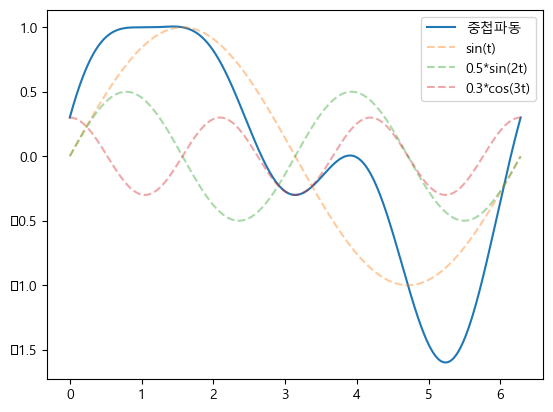

In [27]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(t)
y2 = 0.5 * np.sin(2*t)
y3 = 0.3 * np.cos(3*t)

y_sum = y1 + y2 + y3

plt.plot(t, y_sum, label='중첩파동')
plt.plot(t, y1, '--', alpha=0.4, label='sin(t)')
plt.plot(t, y2, '--', alpha=0.4, label='0.5*sin(2t)')
plt.plot(t, y3, '--', alpha=0.4, label='0.3*cos(3t)')
plt.legend()
plt.show()
